# <center> AI / ML Project - Email Spam Detection 
#### <center> ***Domain: Internet Communication***

# <center>1. Data Exploration

In [3]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
#Importing the dataset

df = pd.read_csv('datasets/Spam.csv')

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,...,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The Datset consists of 58 features & 4601 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [7]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Datset has 57 numerical & 0 categorical features.


In [8]:
#Checking the stats of all the columns

display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,...,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,...,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

# <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


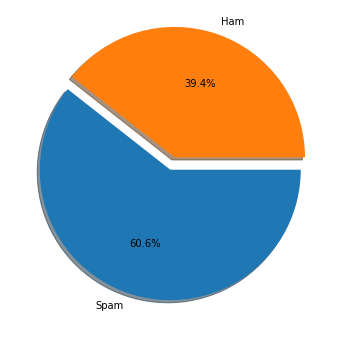

In [9]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('Target Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

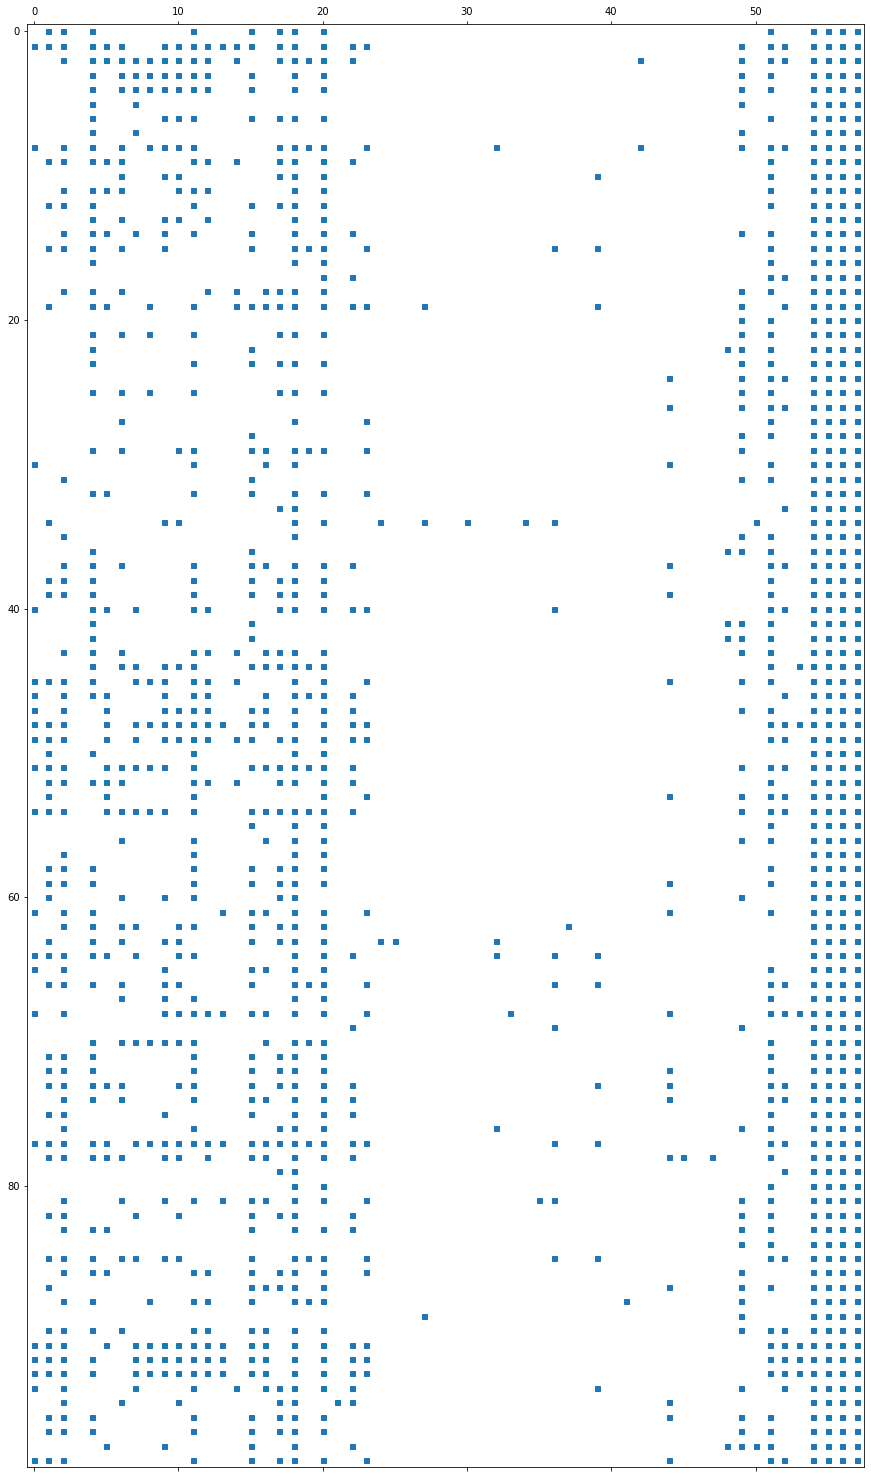

In [10]:
# Visualising the Sparse Matrix

plt.figure(figsize=[15,30])
plt.title('')
plt.spy(df[:100].values, precision = 0.1, markersize = 5)
plt.show()

---

# <center> 3. Data Preprocessing

In [11]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 391


In [12]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                            Total Null Values  Percentage
word_freq_make                              0         0.0
word_freq_857                               0         0.0
word_freq_data                              0         0.0
word_freq_415                               0         0.0
word_freq_85                                0         0.0
word_freq_technology                        0         0.0
word_freq_1999                              0         0.0
word_freq_parts                             0         0.0
word_freq_pm                                0         0.0
word_freq_direct                            0         0.0
word_freq_cs                                0         0.0
word_freq_meeting                           0         0.0
word_freq_original                          0         0.0
word_freq_project                           0         0.0
word_freq_re                                0         0.0
word_freq_edu                               0         0.0
word_freq_tabl

**Inference:** There are many outliers in the dataset. Let us try to impute the missing values

In [13]:
#Fixing the imbalance using SMOTE Technique

df5 = df1.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: spam, dtype: int64


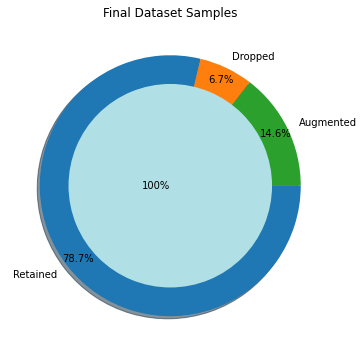


Inference:The final dataset after cleanup has 58 samples & 4601 rows.


In [14]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df1.shape[0], df5.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[1], df.shape[0]))

---

# <center> 4. Data Manipulation

In [15]:
#Splitting the data intro training & testing sets

df = df5.copy()
df.columns=[i.replace('[','_') for i in df.columns]

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5062, 57) (5062,) 
Training set  --->  (4049, 57) (4049,) 
Testing set   --->  (1013, 57)  (1013,)


In [16]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4049.000000,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,-2.544547e-17,-3.334234e-17,-7.019439e-18,-1.403888e-17,-3.860692e-17,2.105832e-17,5.089093e-17,-1.316145e-17,3.860692e-17,1.579374e-17,5.264579e-18,-1.456534e-16,-2.851647e-17,-3.290362e-17,-1.228402e-17,8.774299e-17,7.019439e-17,-8.774299e-18,2.281318e-17,3.509720e-17,1.351242e-16,-1.930346e-17,-4.562635e-17,8.774299e-18,4.036178e-17,...,-1.754860e-17,1.842603e-17,-3.071005e-18,2.083896e-17,4.036178e-17,-3.509720e-18,-1.491631e-17,1.052916e-17,-3.509720e-17,3.948435e-17,-5.571680e-17,0.000000,-2.807776e-17,3.509720e-17,-1.052916e-17,4.211664e-17,-1.623245e-17,-4.474893e-17,1.403888e-17,-6.010395e-17,-6.712339e-17,2.193575e-18,3.641334e-17,8.774299e-18,7.019439e-18
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.779057e-01,-3.034350e-01,-6.194762e-01,-5.884263e-02,-5.122521e-01,-3.944365e-01,-3.475135e-01,-2.959198e-01,-3.612964e-01,-4.002504e-01,-3.526333e-01,-6.710948e-01,-3.386012e-01,-1.916911e-01,-2.137158e-01,-3.623905e-01,-3.680534e-01,-3.880758e-01,-1.059922e+00,-2.203545e-01,-7.954749e-01,-1.399313e-01,-3.531461e-01,-2.652294e-01,-3.191027e-01,...,-1.688447e-01,-1.368305e-01,-1.816722e-01,-2.508799e-01,-3.200704e-01,-5.762090e-02,-1.694115e-01,-1.923714e-01,-1.194527e-01,-1.587503e-01,-1.947600e-01,-0.120789,-2.839458e-01,-1.920771e-01,-7.310870e-02,-1.079907e-01,-1.629838e-01,-5.073489e-01,-1.860212e-01,-3.693881e-01,-3.752922e-01,-1.152742e-01,-1.433384e-01,-2.807969e-01,-5.054993e-01
25%,-3.779057e-01,-3.034350e-01,-6.194762e-01,-5.884263e-02,-5.122521e-01,-3.944365e-01,-3.475135e-01,-2.959198e-01,-3.612964e-01,-4.002504e-01,-3.526333e-01,-6.710948e-01,-3.386012e-01,-1.916911e-01,-2.137158e-01,-3.623905e-01,-3.680534e-01,-3.880758e-01,-9.545992e-01,-2.203545e-01,-7.954749e-01,-1.399313e-01,-3.531461e-01,-2.652294e-01,-3.191027e-01,...,-1.688447e-01,-1.368305e-01,-1.816722e-01,-2.508799e-01,-3.200704e-01,-5.762090e-02,-1.694115e-01,-1.923714e-01,-1.194527e-01,-1.5875


                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.026371,0.098853,0.050123,-0.040733,-0.001095,-0.003068,-0.023539,-0.025588,-0.056038,0.017717,-0.024593,0.008048,-0.002705,0.005210,0.023239,0.005380,-0.006924,0.030007,-0.004825,0.011412,0.028508,-0.035561,0.011349,0.032644,0.052809,...,-0.063285,0.011736,-0.015236,0.046884,-0.002035,0.025317,0.010676,0.008140,-0.043609,-0.006421,0.023288,0.017815,0.029203,0.053273,-0.056307,-0.042034,-0.007422,-0.018947,0.000915,-0.045618,-0.014834,0.111639,0.039475,-0.007566,-0.040564
std,1.147364,1.649516,1.069973,0.388124,0.868773,0.906451,0.938332,0.831927,0.833302,0.924834,0.911812,0.967286,0.955220,1.084929,1.150162,1.101169,1.031751,1.168093,1.034549,1.464232,1.088194,0.886459,1.138039,1.511421,1.274919,...,0.597636,1.034522,0.772297,1.247902,1.064968,1.234203,0.858124,1.002142,0.597792,0.821419,1.051501,1.104436,0.850576,1.340903,0.212937,0.569287,1.083729,0.694145,1.626864,0.572323,0.842885,1.988002,1.247564,0.680217,0.894513
min,-0.377906,-0.303435,-0.619476,-0.058843,-0.512252,-0.394436,-0.347514,-0.295920,-0.361296,-0.400250,-0.352633,-0.671095,-0.338601,-0.191691,-0.213716,-0.362390,-0.368053,-0.388076,-1.059922,-0.220354,-0.795475,-0.139931,-0.353146,-0.265229,-0.319103,...,-0.168845,-0.136830,-0.181672,-0.250880,-0.320070,-0.057621,-0.169411,-0.192371,-0.119453,-0.158750,-0.194760,-0.120789,-0.283946,-0.192077,-0.073109,-0.107991,-0.162984,-0.507349,-0.186021,-0.369388,-0.375292,-0.115274,-0.143338,-0.280797,-0.505499
25%,-0.377906,-0.303435,-0.619476,-0.058843,-0.512252,-0.394436,-0.347514,-0.295920,-0.361296,-0.400250,-0.352633,-0.671095,-0.338601,-0.191691,-0.213716,-0.362390,-0.368053,-0.388076,-0.983855,-0.220354,-0.795475,-0.139931,-0.353146,-0.265229,-0.319103,...,-0.168845,-0.136830,-0.181672,-0.250880,-0.320070,-0.057621,-0.169411,-0.192371,-0.119453,-0.158750,-0.194760,-0.120789,-0.283946,-0.192077,-0.073109,-0.107991,-0.162984,-0.507349,-0.186021,-0.369388,-0.375292,-0.115274,-0.120486,-0.246418,-0.440777
50%,-0.377906,-0.303435,-0.619476,-0.058843,-0.512252,-0.394436,-0.347514,-0.295920,-0.361296,-0.400250,-0.352633,-0.289316,-0.338601,-0.191691,-0.213716,-0.362390,-0.368053,-0.388076,-0.123721,-0.220354,-0.345368,-0.139931,-0.353146,-0.265229,-0.319103,...,-0.168845,-0.136830,-0.181672,-0.250880,-0.320070,-0.057621,-0.169411,-0.192371,-0.119453,-0.158750,-0.194760,-0.120789,-0.283946,-0.192077,-0.073109,-0.107991,-0.162984,-0.253116,-0.186021,-0.275022,-0.375292,-0.115274,-0.097618,-0.207128,-0.333433
75%,-0.257957,-0.281628,0.452652,-0.058843,0.251957,-0.113497,-0.347514,-0.295920,-0.361296,0.072470,-0.352633,0.

---

# <center> 5. Feature Selection/Extraction

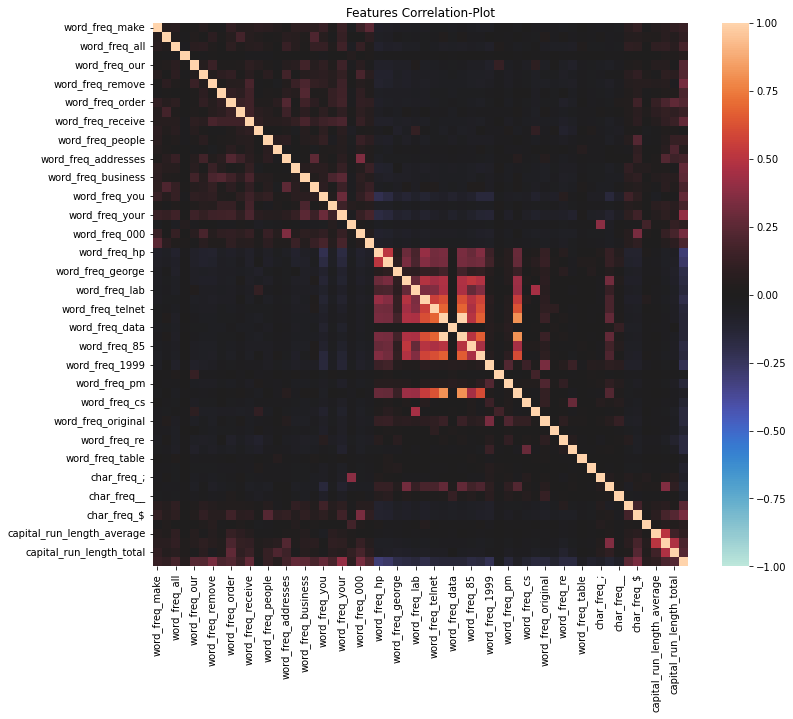

In [17]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset.

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

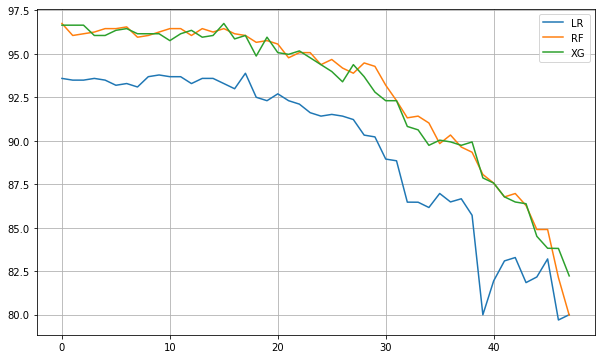

In [18]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        
for i in range(len(X.columns.values)-1):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

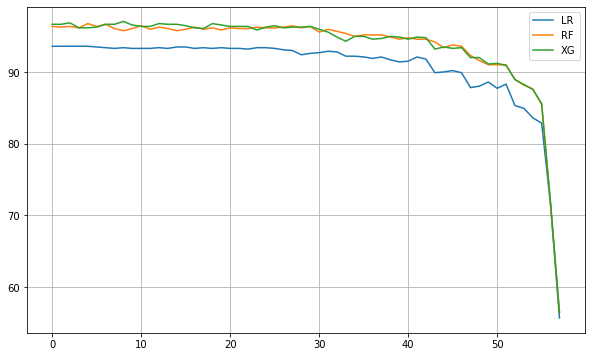

In [19]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in range(len(X.columns.values)):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()
plt.show()

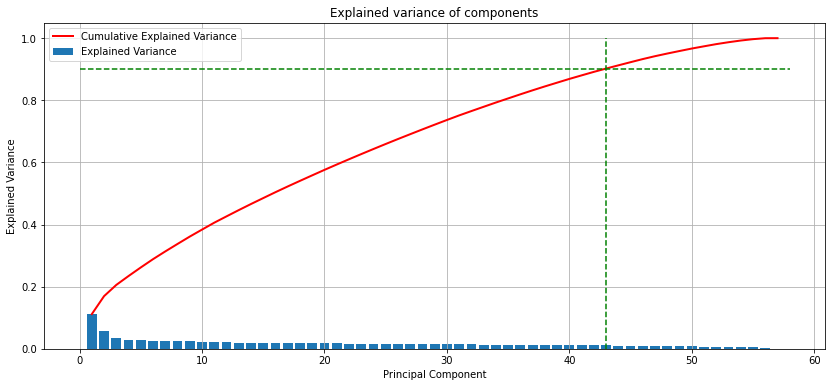

In [20]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([43,43],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

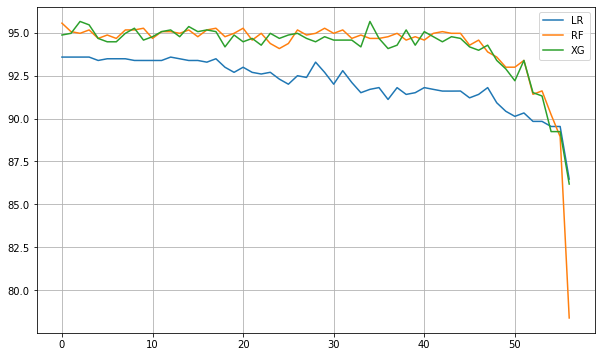

In [21]:
#Applying PCA Transformations

scores1=[]; scores2=[]; scores3=[]
for i in range(len(X.columns.values)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)

    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()
plt.show()

**Inference:** In VIF, RFE & PCA Techniques, we did notice any better scores upon dropping some multicollinear features. But in order to avoid the curse of dimensionality, we can capture top 90% of the data Variance explained by top n PCA components.

In [22]:
#Applying PCA Transformations

pca = PCA(n_components=32)

Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

The shape of final transformed training feature set:
(4049, 32)

The shape of final transformed testing feature set:
(1013, 32)


---

# <center> 6. Predictive Modeling

In [23]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [24]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 93.30000000000001%
F1 Score = 93.30000000000001%

 Confusiton Matrix:
 [[487  26]
 [ 42 458]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       513
           1       0.95      0.92      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



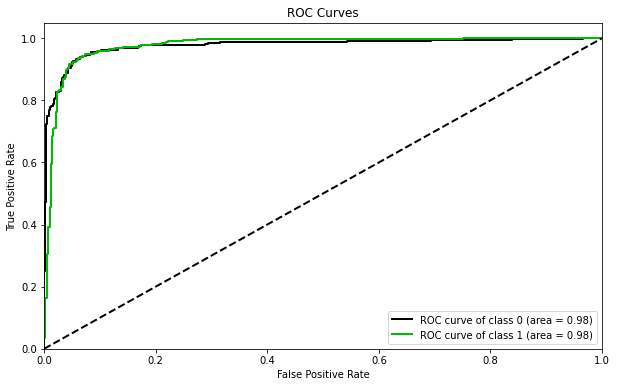


Interpreting the Output of Logistic Regression:

intercept  -2.6379320105366446
classes [0 1]


,coeff
word_freq_make,-0.070784
word_freq_address,0.085600
word_freq_all,0.020918
word_freq_3d,3.772080
word_freq_our,0.340774
word_freq_over,0.200637
word_freq_remove,1.264154
word_freq_internet,0.203144
word_freq_order,0.089503
word_freq_mail,0.048740


In [25]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'liblinear'] # 'lbfgs',
space['penalty'] = ['l2'] #'none','l1','elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 88.9%
F1 Score = 88.9%

 Confusiton Matrix:
 [[470  43]
 [ 69 431]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       513
           1       0.91      0.86      0.89       500

    accuracy                           0.89      1013
   macro avg       0.89      0.89      0.89      1013
weighted avg       0.89      0.89      0.89      1013



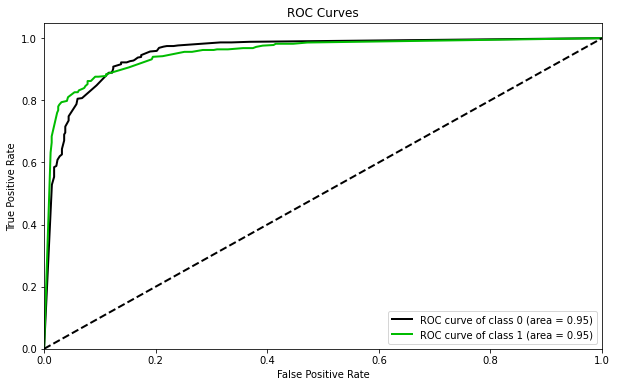


Interpreting the output of Decision Tree:



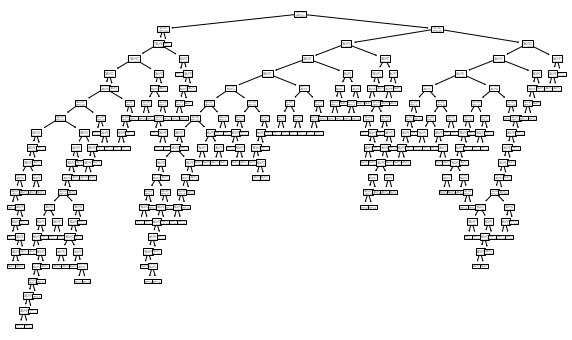

In [26]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 96.3%
F1 Score = 96.3%

 Confusiton Matrix:
 [[500  13]
 [ 24 476]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       513
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



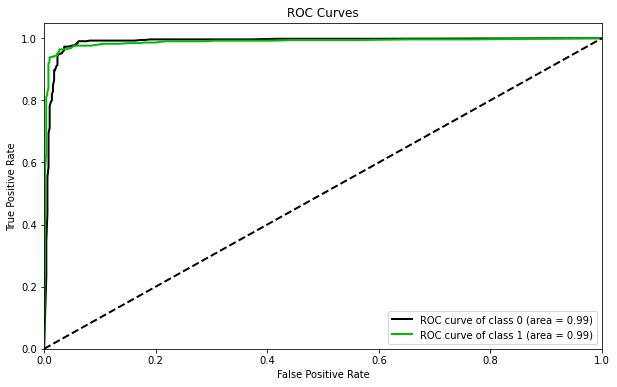


Interpreting the output of Random Forest:



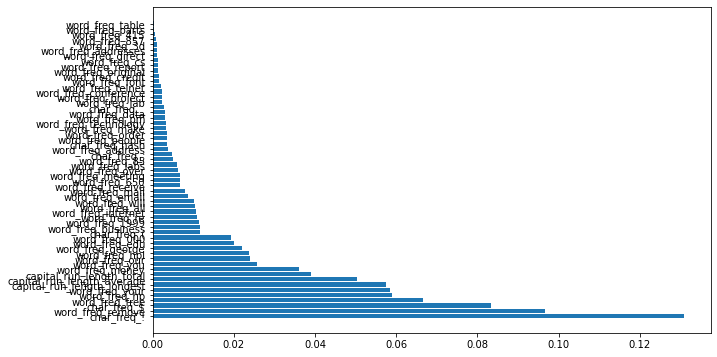

In [27]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 91.7%
F1 Score = 91.7%

 Confusiton Matrix:
 [[496  17]
 [ 67 433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       513
           1       0.96      0.87      0.91       500

    accuracy                           0.92      1013
   macro avg       0.92      0.92      0.92      1013
weighted avg       0.92      0.92      0.92      1013



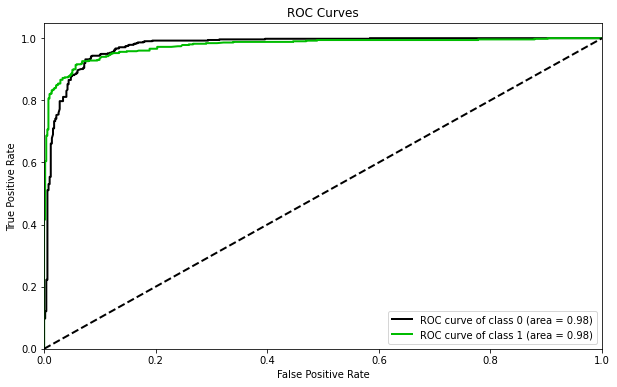

In [28]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

In [ ]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

In [ ]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

In [ ]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
GB = GB_model.fit(Train_X_std, Train_Y)
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

In [ ]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

In [ ]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

In [ ]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Precision score. We can note from the above heatmap that the Random Forest & Boosting Models Performed well on the current dataset...

In [ ]:
#<<<---------------------------------------------THE END----------------------------------------------------------------->>>